In [4]:
# 📌 MOVIE LENS CHART ANALYSIS NOTEBOOK

# 📍 Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📍 Set the charts folder (relative path from Jupyter Notebook)
folder_path = os.path.abspath(os.path.join(os.getcwd(), "charts"))

# ✅ Ensure the path exists
if os.path.exists(folder_path):
    print(f"✅ Folder found: {folder_path}")
else:
    print(f"❌ ERROR: Folder not found! Check your paths.")
    raise SystemExit  # Stop execution if folder is not found

# 📍 Function to find the actual CSV file inside Spark output directories
def find_csv(folder_name):
    """Searches inside Spark-generated folders for the actual CSV file."""
    subdir_path = os.path.join(folder_path, folder_name)
    
    if os.path.isdir(subdir_path):  # Check if the subdir exists
        # Look for the first CSV file inside the directory
        for file in os.listdir(subdir_path):
            if file.startswith("part-00000") and file.endswith(".csv"):
                return os.path.join(subdir_path, file)  # Return full path to the file
    print(f"❌ WARNING: No CSV file found for {folder_name}!")
    return None  # Return None if no valid file is found

# 🔹 Load CSV files dynamically (Mapping folder names to meaningful variables)
file_mapping = {
    "ratings_distribution": "ratings_distribution.csv",
    "top_movies_by_rating": "top_movies_by_rating.csv",
    "top_movies_over_time": "top_movies_over_time.csv",
    "popular_genres_over_time": "popular_genres_over_time.csv",
    "user_rating_behavior": "user_rating_behavior.csv",
    "movie_rating_variance": "movie_rating_variance.csv",
    "ratings_correlation": "ratings_correlation.csv",
    "most_reviewed_genres": "most_popular_genres_per_year.csv",
    "popular_tags": "most_popular_tags_per_year.csv",
    "yearly_trends": "yearly_rating_trends.csv",
}

# 🔍 Dictionary to store found CSV paths
csv_files = {key: find_csv(folder) for key, folder in file_mapping.items()}

# 🔍 **Debugging: Print Found Files**
print("\n🔍 **Files Found:**")
for name, path in csv_files.items():
    if path:
        print(f"✅ {name.replace('_', ' ').title()} Found: {path}")
    else:
        print(f"❌ {name.replace('_', ' ').title()} NOT Found! Check filenames.")

print("\n🎯 Ready to load CSV data into Pandas DataFrames!")

✅ Folder found: C:\Programming\Movie_Lens\analysis\charts

🔍 **Files Found:**
✅ Ratings Distribution Found: C:\Programming\Movie_Lens\analysis\charts\ratings_distribution.csv\part-00000-ec05e0c6-76d2-4302-8297-629e8527792e-c000.csv
✅ Top Movies By Rating Found: C:\Programming\Movie_Lens\analysis\charts\top_movies_by_rating.csv\part-00000-1b61c802-5e49-45eb-afa8-2addfe33bf99-c000.csv
✅ Top Movies Over Time Found: C:\Programming\Movie_Lens\analysis\charts\top_movies_over_time.csv\part-00000-c07a405e-33ca-48ac-b5d2-a0a8f67e2c45-c000.csv
✅ Popular Genres Over Time Found: C:\Programming\Movie_Lens\analysis\charts\popular_genres_over_time.csv\part-00000-e2bda878-cd46-4a76-a267-202307cc0c7d-c000.csv
✅ User Rating Behavior Found: C:\Programming\Movie_Lens\analysis\charts\user_rating_behavior.csv\part-00000-139be894-3d09-49fa-9fe0-22b27a6e9183-c000.csv
✅ Movie Rating Variance Found: C:\Programming\Movie_Lens\analysis\charts\movie_rating_variance.csv\part-00000-1201168f-d536-4d4f-9d9d-e288704e5e

📊 Chart 1: Ratings Distribution
This histogram shows how movie ratings are distributed.
It helps identify trends such as whether users tend to rate movies positively or negatively.
A skew towards high ratings suggests generally favorable reviews, while a more even spread indicates diverse opinions.


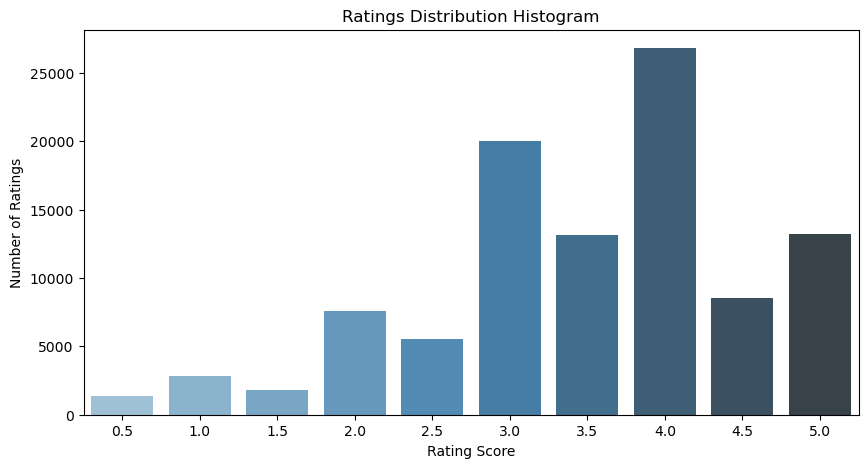


📊 Chart 2: Top 10 Movies by Average Rating
This bar chart displays the highest-rated movies based on average ratings.
It highlights the most critically acclaimed movies in the dataset,
but movies with very few ratings may appear at the top unfairly.


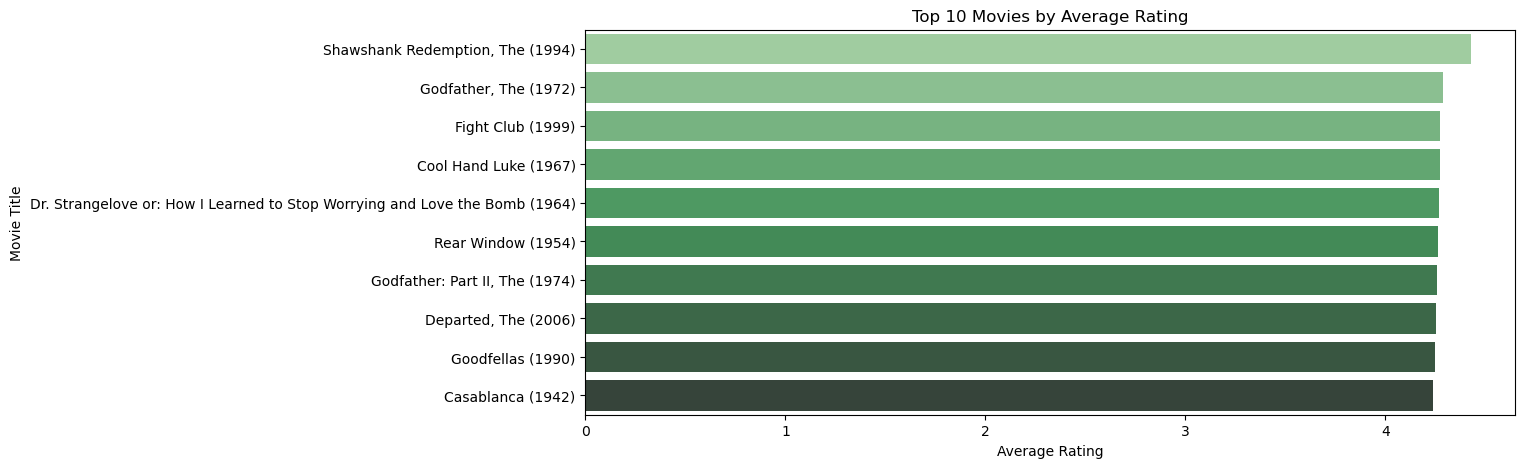


📊 Chart 3: Movie Ratings Trend Over Time
This line chart tracks the average rating of movies per year.
It helps identify whether movies are rated more positively or negatively over time.
Trends might indicate the impact of cultural changes, streaming availability, or nostalgia bias.


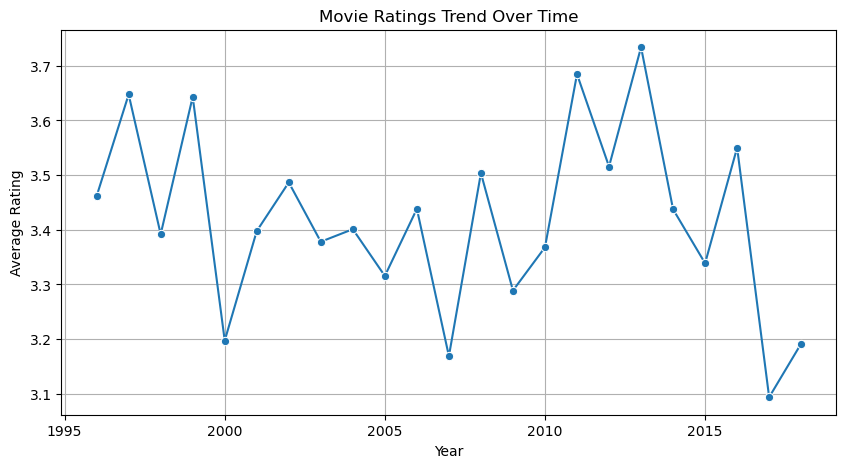


📊 Chart 4: Most Popular Genres Over Time
This stacked bar chart shows which genres received the most ratings per year.
It helps visualize trends in genre popularity—e.g., whether action movies dominate over time
or if sci-fi movies gained popularity in recent years.


<Figure size 1200x600 with 0 Axes>

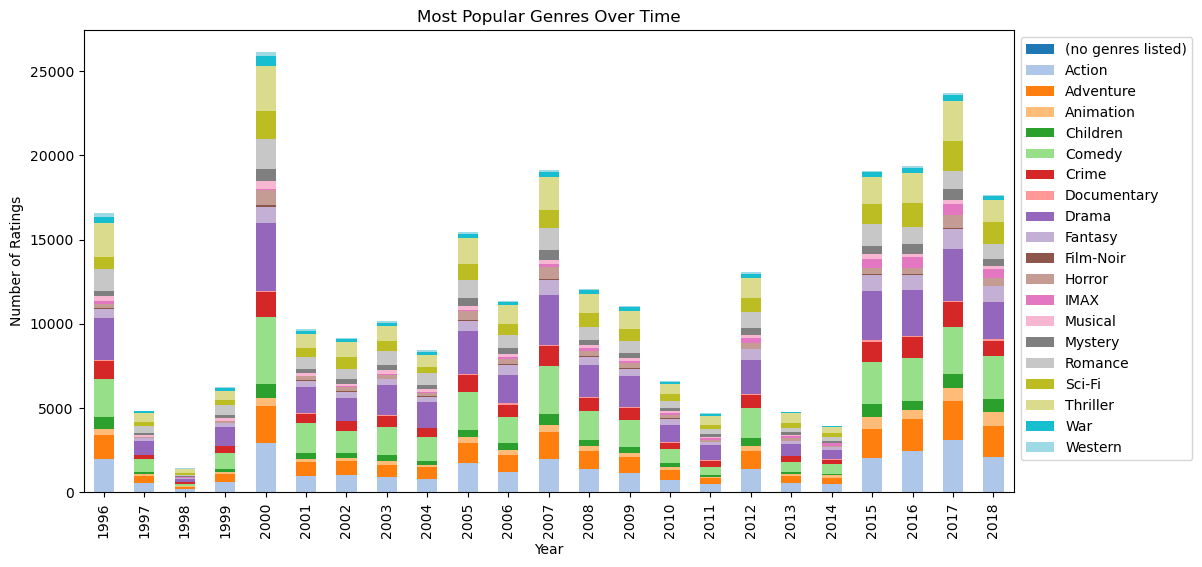


📊 Chart 5: User Rating Behavior
This scatter plot shows the relationship between the number of ratings a user has given
and their average rating score. It helps detect trends such as:
- Are users who rate more movies generally more critical?
- Do casual users give higher ratings on average?


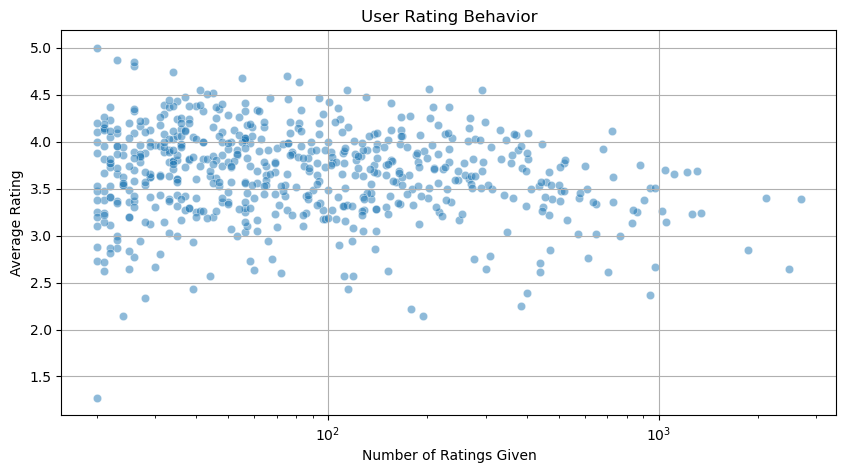


📊 Chart 6: Movie Rating Variance Analysis
This box plot shows how much variation exists in ratings for movies with many reviews.
Some movies have a strong consensus (low variance), while others have highly divisive opinions (high variance).


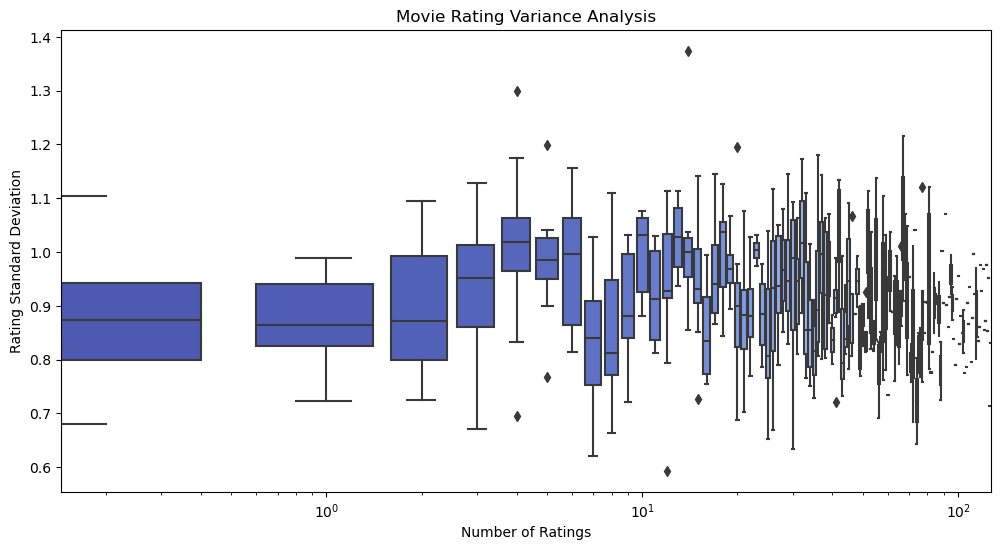


📊 Chart 7: Correlation Between Number of Reviews & Average Rating
This scatter plot examines whether movies with more reviews tend to have higher or lower average ratings.
It helps reveal whether niche movies receive higher ratings from dedicated fans,
while widely reviewed movies get more balanced scores.


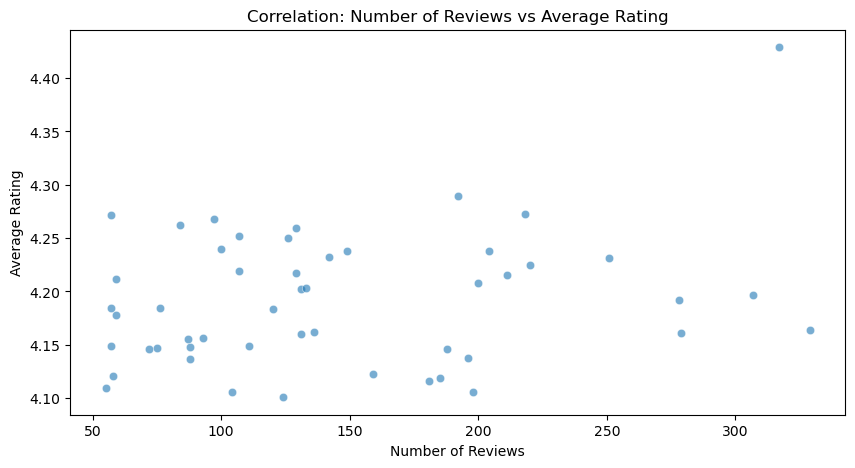


📊 Chart 8: Most Reviewed Genres Per Year
This stacked bar chart breaks down the most reviewed genres for each year.
It helps reveal how audience preferences shifted over time
and whether certain genres dominate in different eras.


<Figure size 1200x600 with 0 Axes>

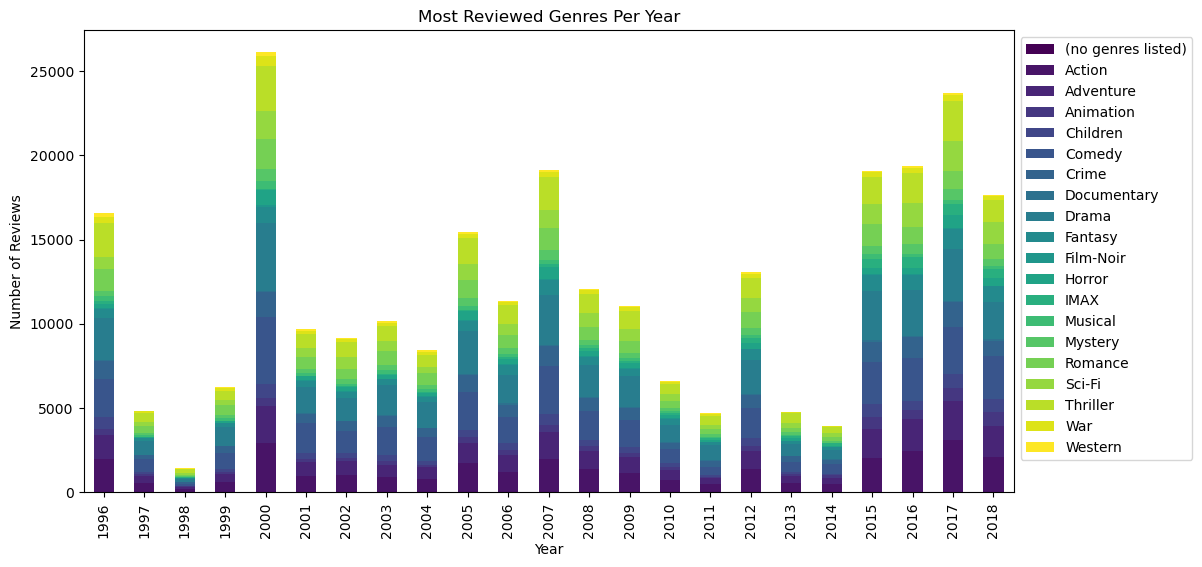


📊 Chart 9: Most Popular Tags Per Year
This bar chart identifies which tags (user-assigned labels) were most used per year.
To keep the chart readable, only the **top 10 most used tags per year** are displayed.


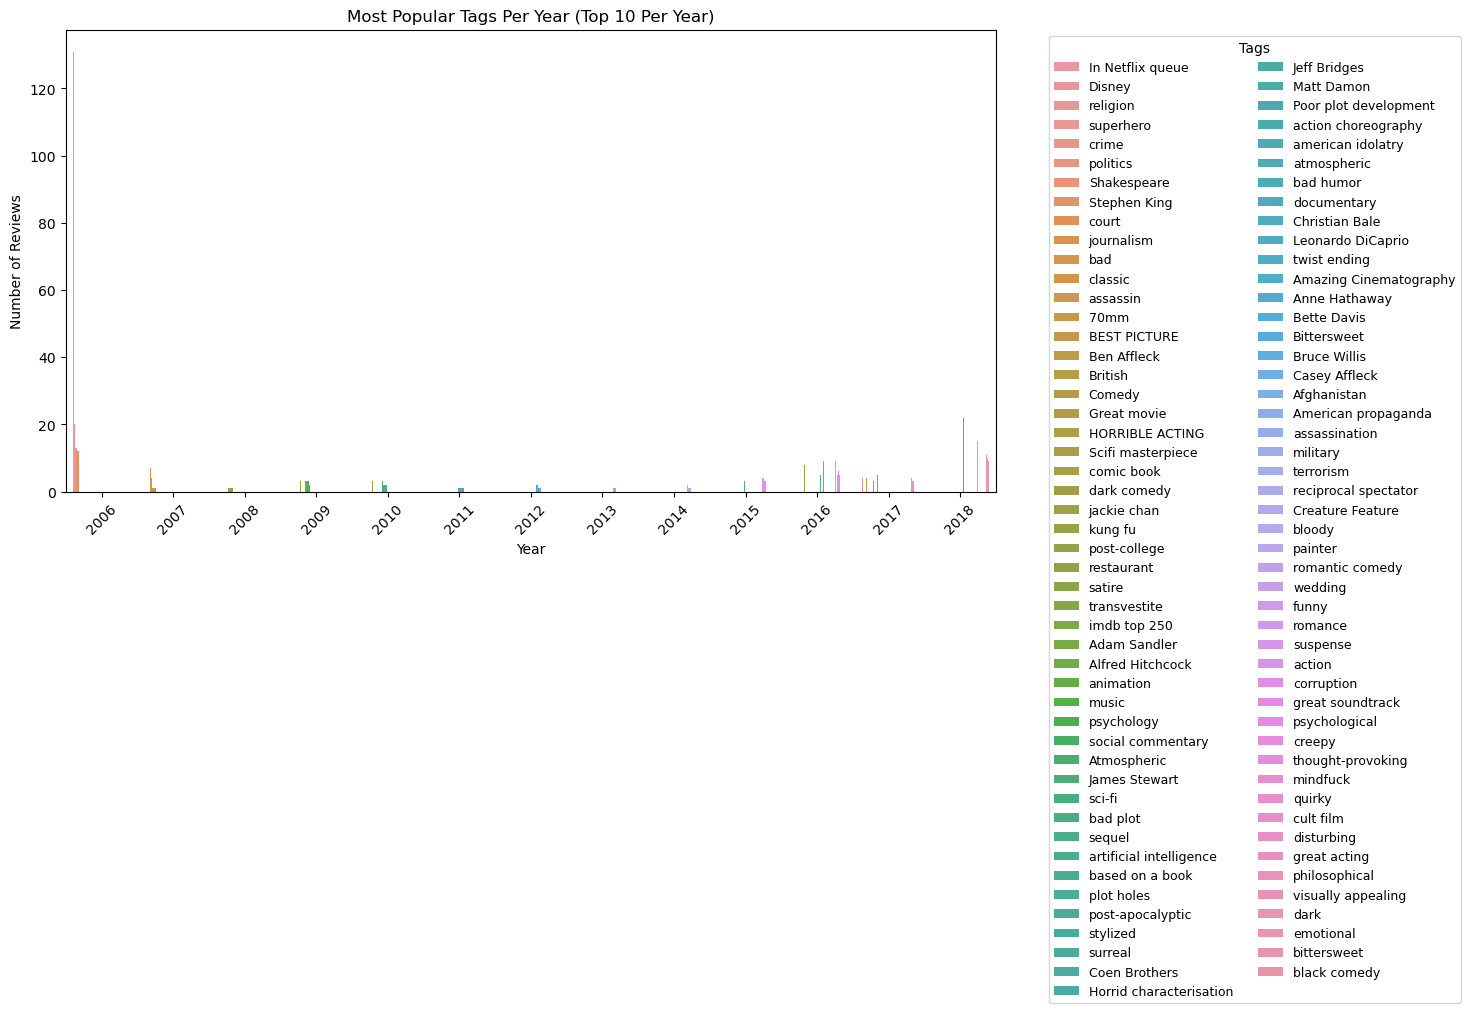


📊 Chart 10: Yearly Trends of Average Rating & Review Volume
This dual-axis line chart shows the overall review volume trend alongside
the average rating each year. It helps spot whether an increase in reviews
correlates with higher or lower average ratings.


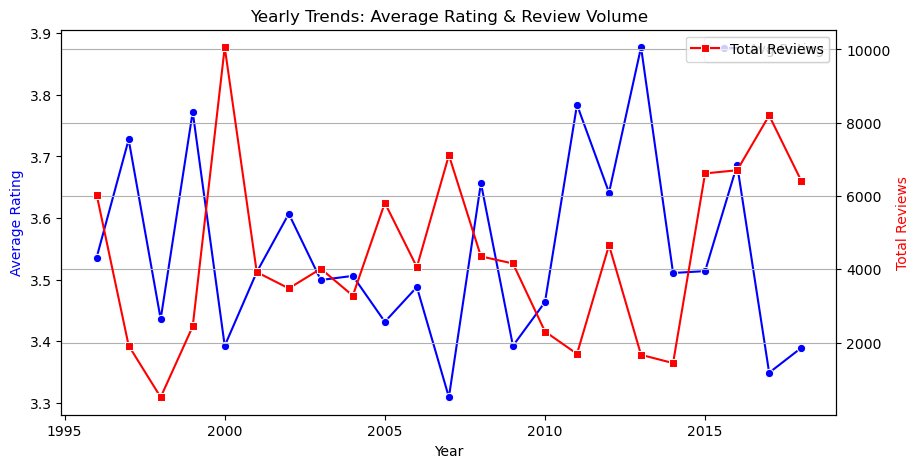


✅ All charts successfully generated!


In [7]:
# 📌 1️⃣ Ratings Distribution (Histogram)
print("📊 Chart 1: Ratings Distribution\n"
      "This histogram shows how movie ratings are distributed.\n"
      "It helps identify trends such as whether users tend to rate movies positively or negatively.\n"
      "A skew towards high ratings suggests generally favorable reviews, while a more even spread indicates diverse opinions.")

if csv_files["ratings_distribution"]:
    df = pd.read_csv(csv_files["ratings_distribution"])
    plt.figure(figsize=(10,5))
    sns.barplot(x=df['rating'], y=df['count'], palette="Blues_d")
    plt.xlabel("Rating Score")
    plt.ylabel("Number of Ratings")
    plt.title("Ratings Distribution Histogram")
    plt.show()

# 📌 2️⃣ Top 10 Movies by Average Rating (Bar Chart)
print("\n📊 Chart 2: Top 10 Movies by Average Rating\n"
      "This bar chart displays the highest-rated movies based on average ratings.\n"
      "It highlights the most critically acclaimed movies in the dataset,\n"
      "but movies with very few ratings may appear at the top unfairly.")

if csv_files["top_movies_by_rating"]:
    df = pd.read_csv(csv_files["top_movies_by_rating"])
    df = df.sort_values(by="avg_rating", ascending=False).head(10)
    plt.figure(figsize=(12,5))
    sns.barplot(y=df["title"], x=df["avg_rating"], palette="Greens_d")
    plt.xlabel("Average Rating")
    plt.ylabel("Movie Title")
    plt.title("Top 10 Movies by Average Rating")
    plt.show()

# 📌 3️⃣ Movie Ratings Over Time (Line Chart)
print("\n📊 Chart 3: Movie Ratings Trend Over Time\n"
      "This line chart tracks the average rating of movies per year.\n"
      "It helps identify whether movies are rated more positively or negatively over time.\n"
      "Trends might indicate the impact of cultural changes, streaming availability, or nostalgia bias.")

if csv_files["top_movies_over_time"]:
    df = pd.read_csv(csv_files["top_movies_over_time"])
    df_grouped = df.groupby("year")["avg_rating"].mean().reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=df_grouped["year"], y=df_grouped["avg_rating"], marker="o")
    plt.xlabel("Year")
    plt.ylabel("Average Rating")
    plt.title("Movie Ratings Trend Over Time")
    plt.grid(True)
    plt.show()

# 📌 4️⃣ Most Popular Genres Over Time (Stacked Bar Chart)
print("\n📊 Chart 4: Most Popular Genres Over Time\n"
      "This stacked bar chart shows which genres received the most ratings per year.\n"
      "It helps visualize trends in genre popularity—e.g., whether action movies dominate over time\n"
      "or if sci-fi movies gained popularity in recent years.")

if csv_files["popular_genres_over_time"]:
    df = pd.read_csv(csv_files["popular_genres_over_time"])
    plt.figure(figsize=(12,6))
    df_pivot = df.pivot(index="year", columns="genre", values="num_ratings").fillna(0)
    df_pivot.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")
    plt.xlabel("Year")
    plt.ylabel("Number of Ratings")
    plt.title("Most Popular Genres Over Time")
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

# 📌 5️⃣ User Rating Behavior (Scatter Plot)
print("\n📊 Chart 5: User Rating Behavior\n"
      "This scatter plot shows the relationship between the number of ratings a user has given\n"
      "and their average rating score. It helps detect trends such as:\n"
      "- Are users who rate more movies generally more critical?\n"
      "- Do casual users give higher ratings on average?")

if csv_files["user_rating_behavior"]:
    df = pd.read_csv(csv_files["user_rating_behavior"])
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df["num_ratings"], y=df["avg_rating"], alpha=0.5)
    plt.xlabel("Number of Ratings Given")
    plt.ylabel("Average Rating")
    plt.title("User Rating Behavior")
    plt.xscale("log")  # Log scale to better visualize spread
    plt.grid(True)
    plt.show()

# 📌 6️⃣ Movie Rating Variance (Box Plot)
print("\n📊 Chart 6: Movie Rating Variance Analysis\n"
      "This box plot shows how much variation exists in ratings for movies with many reviews.\n"
      "Some movies have a strong consensus (low variance), while others have highly divisive opinions (high variance).")

if csv_files["movie_rating_variance"]:
    df = pd.read_csv(csv_files["movie_rating_variance"])
    plt.figure(figsize=(12,6))
    sns.boxplot(x=df["num_ratings"], y=df["rating_stddev"], palette="coolwarm")
    plt.xlabel("Number of Ratings")
    plt.ylabel("Rating Standard Deviation")
    plt.title("Movie Rating Variance Analysis")
    plt.xscale("log")
    plt.show()

# 📌 7️⃣ Correlation Between Reviews & Average Rating (Scatter Plot)
print("\n📊 Chart 7: Correlation Between Number of Reviews & Average Rating\n"
      "This scatter plot examines whether movies with more reviews tend to have higher or lower average ratings.\n"
      "It helps reveal whether niche movies receive higher ratings from dedicated fans,\n"
      "while widely reviewed movies get more balanced scores.")

if csv_files["ratings_correlation"]:
    df = pd.read_csv(csv_files["ratings_correlation"])
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df["num_ratings"], y=df["avg_rating"], alpha=0.6)
    plt.xlabel("Number of Reviews")
    plt.ylabel("Average Rating")
    plt.title("Correlation: Number of Reviews vs Average Rating")
    plt.show()

# 📌 8️⃣ Most Reviewed Genres Per Year (Stacked Bar Chart)
print("\n📊 Chart 8: Most Reviewed Genres Per Year\n"
      "This stacked bar chart breaks down the most reviewed genres for each year.\n"
      "It helps reveal how audience preferences shifted over time\n"
      "and whether certain genres dominate in different eras.")

if csv_files["most_reviewed_genres"]:
    df = pd.read_csv(csv_files["most_reviewed_genres"])
    plt.figure(figsize=(12,6))
    df_pivot = df.pivot(index="year", columns="genre", values="num_reviews").fillna(0)
    df_pivot.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")
    plt.xlabel("Year")
    plt.ylabel("Number of Reviews")
    plt.title("Most Reviewed Genres Per Year")
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

# 📌 9️⃣ Most Popular Tags Per Year (Bar Chart)
print("\n📊 Chart 9: Most Popular Tags Per Year\n"
      "This bar chart identifies which tags (user-assigned labels) were most used per year.\n"
      "To keep the chart readable, only the **top 10 most used tags per year** are displayed.")

if csv_files["popular_tags"]:
    df = pd.read_csv(csv_files["popular_tags"])
    
    # 🔹 Select the top 10 most used tags per year
    df_grouped = df.groupby(["year", "tag"])["num_reviews"].sum().reset_index()
    df_grouped = df_grouped.sort_values(["year", "num_reviews"], ascending=[True, False])  # Sort by year then reviews
    df_top10 = df_grouped.groupby("year").head(10)  # Take only top 10 tags per year
    
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_top10, x="year", y="num_reviews", hue="tag", dodge=True)
    
    plt.xlabel("Year")
    plt.ylabel("Number of Reviews")
    plt.title("Most Popular Tags Per Year (Top 10 Per Year)")
    
    plt.xticks(rotation=45)
    
    # 🔹 Adjust legend: limit number of tags displayed and place it outside the chart
    plt.legend(title="Tags", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2, fontsize=9)
    
    plt.show()


# 📌 🔟 Yearly Trends of Average Rating & Review Volume (Dual Line Chart)
print("\n📊 Chart 10: Yearly Trends of Average Rating & Review Volume\n"
      "This dual-axis line chart shows the overall review volume trend alongside\n"
      "the average rating each year. It helps spot whether an increase in reviews\n"
      "correlates with higher or lower average ratings.")

if csv_files["yearly_trends"]:
    df = pd.read_csv(csv_files["yearly_trends"])
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    sns.lineplot(x=df["year"], y=df["avg_rating"], marker="o", color="b", label="Avg Rating", ax=ax1)
    ax1.set_ylabel("Average Rating", color="b")
    ax1.set_xlabel("Year")
    
    ax2 = ax1.twinx()
    sns.lineplot(x=df["year"], y=df["total_reviews"], marker="s", color="r", label="Total Reviews", ax=ax2)
    ax2.set_ylabel("Total Reviews", color="r")

    plt.title("Yearly Trends: Average Rating & Review Volume")
    plt.grid(True)
    plt.show()

print("\n✅ All charts successfully generated!")
